# 0. Setup



In [1]:
!conda create -n virtenv python=3.8 -y & conda init bash

no change     /anaconda/condabin/conda
no change     /anaconda/bin/conda
no change     /anaconda/bin/conda-env
no change     /anaconda/bin/activate
no change     /anaconda/bin/deactivate
modified      /anaconda/etc/profile.d/conda.sh
no change     /anaconda/etc/fish/conf.d/conda.fish
no change     /anaconda/shell/condabin/Conda.psm1
no change     /anaconda/shell/condabin/conda-hook.ps1
no change     /anaconda/lib/python3.8/site-packages/xontrib/conda.xsh
no change     /anaconda/etc/profile.d/conda.csh
modified      /home/azureuser/.bashrc

==> For changes to take effect, close and re-open your current shell. <==



In [2]:
!pip3 install yfinance seaborn


     |████████████████████████████████| 285 kB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 15.2 MB/s eta 0:00:01     |███████▏                        | 1.2 MB 15.2 MB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=b143ae76c02fa8144add6dc2cd32e83abbee29e028d43d24aaabaa97bb7d3ec3
  Stored in directory: /home/azureuser/.cache/pip/wheels/68/72/87/a384b8b8139f2489024464d6f5937e6acb2054c57d25519fb9
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=9734dc6ba90fdaa4b07675e76f8914d721917724e4600018f3c7125458ee7be2
  Stored in directory: /home/azureuser/.cache/pip/wheels/5e/8a/c4/59c699498647c7c94b14c87a904ca7540646107b3d94b7c320
Successfully built yfinance multitasking


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import yfinance as yf

In [4]:
!pip3 install 'arch<=4.15'

     |████████████████████████████████| 790 kB 6.9 MB/s eta 0:00:01     |███████▌                        | 184 kB 6.9 MB/s eta 0:00:01     |██████████████████████████████▊ | 757 kB 6.9 MB/s eta 0:00:01


In [5]:
from arch import arch_model

# 1. Volatility Modeling and Its Application



Due to increased integrations and complex and deepening financial operations, the financial markets have a high level of uncertainty, which should be understood and modeled to gain insight about what is going on in the market. Uncertainty comes in the form of volatility, which, in turn, amounts to information. To this end, determining the causes of volatility in financial markets and predicting these movements beforehand have become an indispensable condition of financial success in these markets.

Besides, volatility and risk go in tandem in financial markets. Increasing risk emanating from volatility poses a huge threat to investment decisions. So, it is not adequate to know the current volatility in the market, investors should have knowledge about the likely future path of volatility as well. Only after that, can an investor properly gauge the market dynamics and risk level, which enables her to invest in a well-founded way.

Despite its theoretical appeal and intuitiveness, some of the main assumptions of financial modeling have been attacked by certain researchers. As it is empirically shown, asset returns do not conform to the assumptions of random walk theorem such as constant variance and independence. Besides, linear models are not able to capture the main characteristics of financial variables, which are:

* Leptokurtosis: By and large, financial variables show fat tail and excess peakedness, which is a deviation from normal distribution.
* Volatility Clustering: In financial markets, volatilities co-move. That is to say, a high volatility is followed by another high volatility or vice versa.
* Leverage: Empirical studies suggest that there is an asymmetry in volatility, meaning that volatility in high price drops can generate higher volatility than a price increase can.

In this lesson, we will study some well-known volatility models:
* `ARCH`, 
* `GARCH`, and 
* `EGARCH` 

Then, we will conduct prediction analyses based on them.

# 2. Volatility Prediction based on ARCH model 

In order to take into account all these deviations (i.e., leptokurtosis, volatility clustering, and leverage), the `ARCH` (Autoregressive Conditional Heteroscedasticity) model by Engle (1982) and Bollerslev (1986), has been proposed. Mathematically speaking:

$$
\sigma^2_t=\alpha_0+\alpha_1u^2_{t-1}+\alpha_2u^2_{t-2}+\cdots...+\alpha_qu^2_{t-q}=\alpha_0+\sum_i^q\alpha_iu^2_{t-i}
$$

where $\alpha_0>0, \alpha_i>0, \text{ and } u_t=\sigma_tz_t$

The steps we need to estimate the ARCH model are:
* Fitting autoregressive model to obtain $u_i$. $r_t=\alpha_0+\alpha_1r_{t-1}+\cdots...+\alpha_pr_{t-q}+u_t$
* After having $u^2$, regress them on a constant $\alpha$ and q lagged values of error terms

Let's model the volatility using the ARCH model in Python. We will employ four arbitrarily selected stocks:

* BlackRock Inc, because it has amazing ticker code :D == BLK
* Amazon.com Inc.
* Alphabet Inc. Class C (the company formerly known as Google)
* Microsoft

Using Yahoo Finance, we retrieve daily stock prices of our four stocks for the period of `01-01-2010` and `01-04-2020`:

In [22]:
stocks = ['BLK','GOOG','AMZN', 'MSFT']
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2021,3,1)
stock_prices = yf.download(stocks,start=start,end = end, interval='1d')['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [23]:
stock_prices.head()

,AMZN,BLK,GOOG,MSFT
Date,,,,
2010-01-04,133.899994,177.456573,312.204773,24.049969
2010-01-05,134.690002,178.222595,310.829926,24.057743
2010-01-06,132.250000,174.548233,302.994293,23.910097
2010-01-07,130.000000,176.467255,295.940735,23.661432
2010-01-08,133.520004,177.709381,299.885956,23.824627


As we may notice, it is not stock price but return that we used as a variable in modeling volatility and, by convention, log return is embraced in the literature. As a final step, we scale returns up by 100 to get rid of convergence issues:

In [24]:
returns_all=[]
for i in stock_prices.columns:
    log_returns=np.log(stock_prices[str(i)]/stock_prices[str(i)].shift(1))
    returns_all.append(100*log_returns)

Here, we turn list objects into a dataframe and transpose it to properly aligned rows and columns:

In [25]:
returns_all=pd.DataFrame(returns_all)
returns_all=returns_all.T

In [26]:
returns_all=pd.DataFrame(returns_all,columns=stock_prices.columns)
returns_all

,AMZN,BLK,GOOG,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.588265,0.430738,-0.441340,0.032321
2010-01-06,-1.828179,-2.083219,-2.553193,-0.615606
2010-01-07,-1.715962,1.093422,-2.355476,-1.045445
2010-01-08,2.671686,0.701419,1.324304,0.687340
...,...,...,...,...
2021-02-22,-2.151033,-0.986386,-1.740795,-2.717424
2021-02-23,0.431671,0.002838,0.289198,-0.530161
2021-02-24,-1.100729,1.263392,1.167063,0.547220


As a final step of the data preparation, we drop the `NaN` values that we see at the first row of the `returns_all` data. Then, we obtain summary statistics providing the very first assessment of the data:

In [27]:
returns_all.dropna(inplace=True)

In [28]:
returns_all.describe()

,AMZN,BLK,GOOG,MSFT
count,2806.000000,2806.000000,2806.000000,2806.000000
mean,0.111895,0.048416,0.066839,0.080835
std,1.988740,1.770043,1.639652,1.599079
min,-13.532540,-14.681467,-11.766726,-15.945349
25%,-0.839889,-0.759888,-0.653475,-0.681404
50%,0.106373,0.069267,0.063574,0.069823
75%,1.154160,0.951999,0.874674,0.862759
max,14.622537,12.684327,14.887189,13.292897


As expected, the visualization tells us that the returns of the stocks at our disposal fluctuate around zero, but it is not possible to state that we have constant volatility:

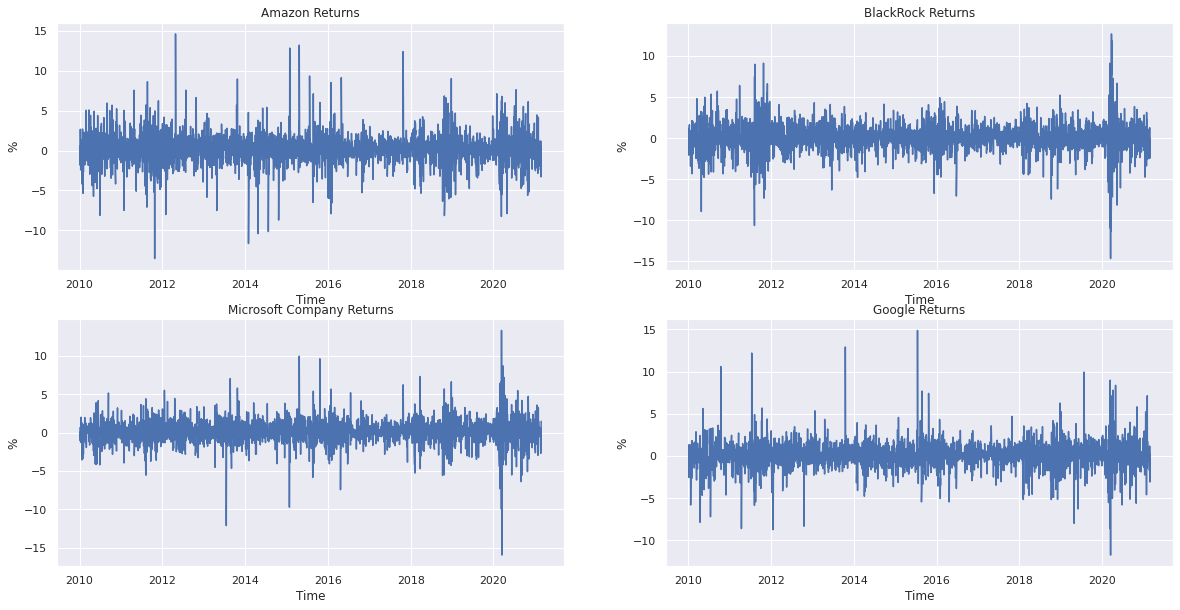

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(returns_all['AMZN'])
plt.ylabel('%')
plt.title('Amazon Returns')
plt.xlabel('Time')
plt.subplot(2,2,2)
plt.plot(returns_all['BLK'])
plt.ylabel('%')
plt.title('BlackRock Returns')
plt.xlabel('Time')
plt.subplot(2,2,3)
plt.plot(returns_all['MSFT'])
plt.ylabel('%')
plt.title('Microsoft Company Returns')
plt.xlabel('Time')
plt.subplot(2,2,4)
plt.plot(returns_all['GOOG'])
plt.ylabel('%')
plt.title('Google Returns')
plt.xlabel('Time')
plt.show()

In [30]:
results_arch=[]
for i in returns_all.columns:
    results_arch.append(arch_model((returns_all[i]),mean='Constant',vol='arch',dist='Normal').fit(disp='off'))

The result of the ARCH model is given below. `omega` and `alpha` are the constant term and slope coefficients, respectively. Based on this estimation, we conduct our prediction. In the prediction, we employ these estimated coefficients:

In [31]:
results_arch

[                      Constant Mean - ARCH Model Results                      
 Dep. Variable:                   AMZN   R-squared:                      -0.000
 Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
 Vol Model:                       ARCH   Log-Likelihood:               -5847.93
 Distribution:                  Normal   AIC:                           11701.9
 Method:            Maximum Likelihood   BIC:                           11719.7
                                         No. Observations:                 2806
 Date:                Tue, Mar 16 2021   Df Residuals:                     2803
 Time:                        19:08:37   Df Model:                            3
                                 Mean Model                                
                  coef    std err          t      P>|t|    95.0% Conf. Int.
 --------------------------------------------------------------------------
 mu             0.1383  3.603e-02      3.839  1.234e

In [32]:
split_date='2019-02-01'
forecast_arch=[]
for i in range(len(returns_all.columns)):
    forecast_arch.append(results_arch[i].forecast(start=split_date).variance[split_date:].mean(axis=1))

In [33]:
forecast_arch=pd.DataFrame(forecast_arch).T

In [34]:
forecast_arch.columns=returns_all.columns
forecast_arch

,AMZN,BLK,GOOG,MSFT
Date,,,,
2019-02-01,10.274962,2.066173,2.128171,2.642892
2019-02-04,3.186532,2.041856,3.038545,4.014877
2019-02-05,3.607174,2.035723,2.359626,2.248607
2019-02-06,3.519711,2.064727,4.258393,2.215858
2019-02-07,3.828226,2.076772,2.733316,1.965984
...,...,...,...,...
2021-02-22,4.325732,2.375993,2.972630,4.199854
2021-02-23,3.186174,2.028326,2.043086,1.880592
2021-02-24,3.506523,2.481343,2.365408,1.810324


To compare how good our prediction is we need a benchmark variable, which is `realized variance` in this case. Though there are different approaches, realized variance is computed here as a standard deviation of the returns. The standard deviation of the stock is computed in a way to include five subsequent returns in the calculated standard deviation. Then, a second five subsequent returns, and the next five, and so on. It is know as the `rolling` method and the number of subsequent returns are labeled as `window size`.

In [35]:
window_size=5
rv_all=[]
for j in returns_all.columns:
    rv=(returns_all[j]).rolling(window_size).std()
    rv_all.append(rv)
rv_all=pd.DataFrame(rv_all).T
rv_all.dropna(inplace=True)

As we start our prediction from the split date, which is `2019-02-01`, the orange line representing ARCH prediction starts at the split date and makes predictions all the way to the last date of our dataset. The result does look good, doesn't it? 

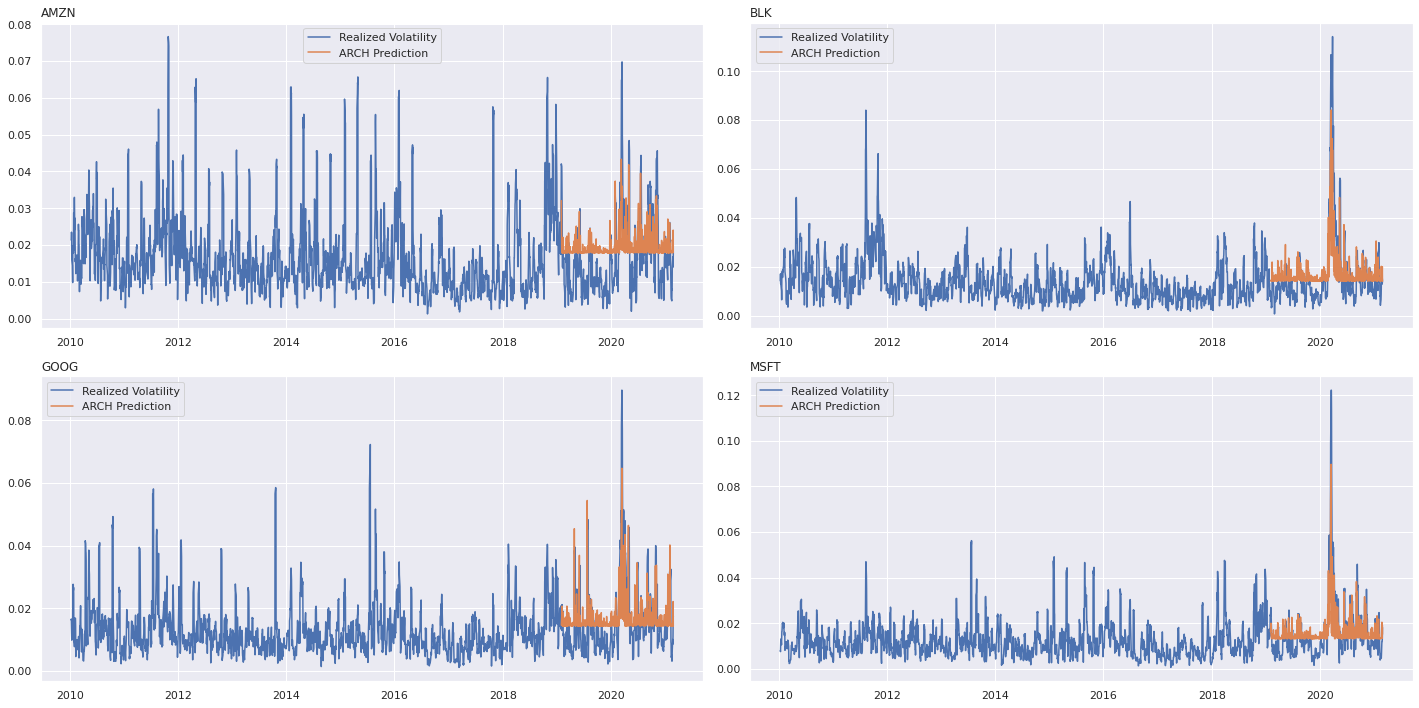

In [36]:
sns.set()
plt.figure(figsize=(20,10))
k=0
for i,j in zip(returns_all.columns,range(len(returns_all.columns))):
    k+=1
    plt.subplot(2,2, k)
    plt.tight_layout()
    plt.plot(rv_all[i]/100,label='Realized Volatility')
    plt.plot(np.sqrt(forecast_arch.iloc[:,j])/100,label='ARCH Prediction')
    plt.title(i, loc='left', fontsize=12)
    plt.legend(loc='best')

# 3. Volatility Prediction Based on GARCH Model 

Bollerslev (1986) and Taylor (2008) improved the ARCH model by adding lagged conditional variance into the equation and it is referred to as `GARCH` (The Generalized Autoregressive Conditional Heteroscedasticity). The mathematical equation is similar to ARCH except for one term, which is the past values of conditional volatility $\sigma^2$:

$$
\sigma^2_t=\omega+\beta\sigma^2_{t-1}+\alpha u^2_{t-1}
$$

where $\omega$, $\beta$, and $\alpha$ are parameters and have restrictions: $\omega$ $>$ 0, $\beta$ $\geq$ 0, and $\alpha$ $\geq$ 0. 

In [37]:
results_garch=[]
for i in returns_all.columns:
    results_garch.append(arch_model((returns_all[i]),mean='Constant',vol='garch',dist='Normal').fit(disp='off'))

Different from the ARCH model, we have one more variable, $\beta$, attached to lagged values of conditional variance. The GARCH model result is exhibited below:

In [38]:
results_garch

[                     Constant Mean - GARCH Model Results                      
 Dep. Variable:                   AMZN   R-squared:                      -0.001
 Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
 Vol Model:                      GARCH   Log-Likelihood:               -5784.79
 Distribution:                  Normal   AIC:                           11577.6
 Method:            Maximum Likelihood   BIC:                           11601.3
                                         No. Observations:                 2806
 Date:                Tue, Mar 16 2021   Df Residuals:                     2802
 Time:                        19:09:09   Df Model:                            4
                                 Mean Model                                
                  coef    std err          t      P>|t|    95.0% Conf. Int.
 --------------------------------------------------------------------------
 mu             0.1637  3.577e-02      4.577  4.711e

As of the same split date, we initiate the prediction:

In [39]:
forecast_garch=[]
for i in range(len(returns_all.columns)):
    forecast_garch.append(results_garch[i].forecast(start=split_date).variance[split_date:].mean(axis=1))

In [40]:
forecast_garch=pd.DataFrame(forecast_garch).T

In [41]:
forecast_garch.columns=returns_all.columns
forecast_garch

,AMZN,BLK,GOOG,MSFT
Date,,,,
2019-02-01,10.607008,1.771655,2.896891,3.494249
2019-02-04,8.432877,1.632256,2.966793,4.040878
2019-02-05,7.079309,1.510498,2.743782,3.485577
2019-02-06,6.018205,1.414622,3.333363,3.061142
2019-02-07,5.437902,1.335459,3.173897,2.618606
...,...,...,...,...
2021-02-22,3.564103,2.166206,2.280517,2.629535
2021-02-23,3.121009,1.970776,2.081811,2.259140
2021-02-24,3.023489,1.941487,2.060475,1.953430


The following plots show that the volatility prediction based on GARCH is more volatile than the ARCH model, which is not surprising because the GARCH model has more parameters that enable us to better capture the dynamics of the data.

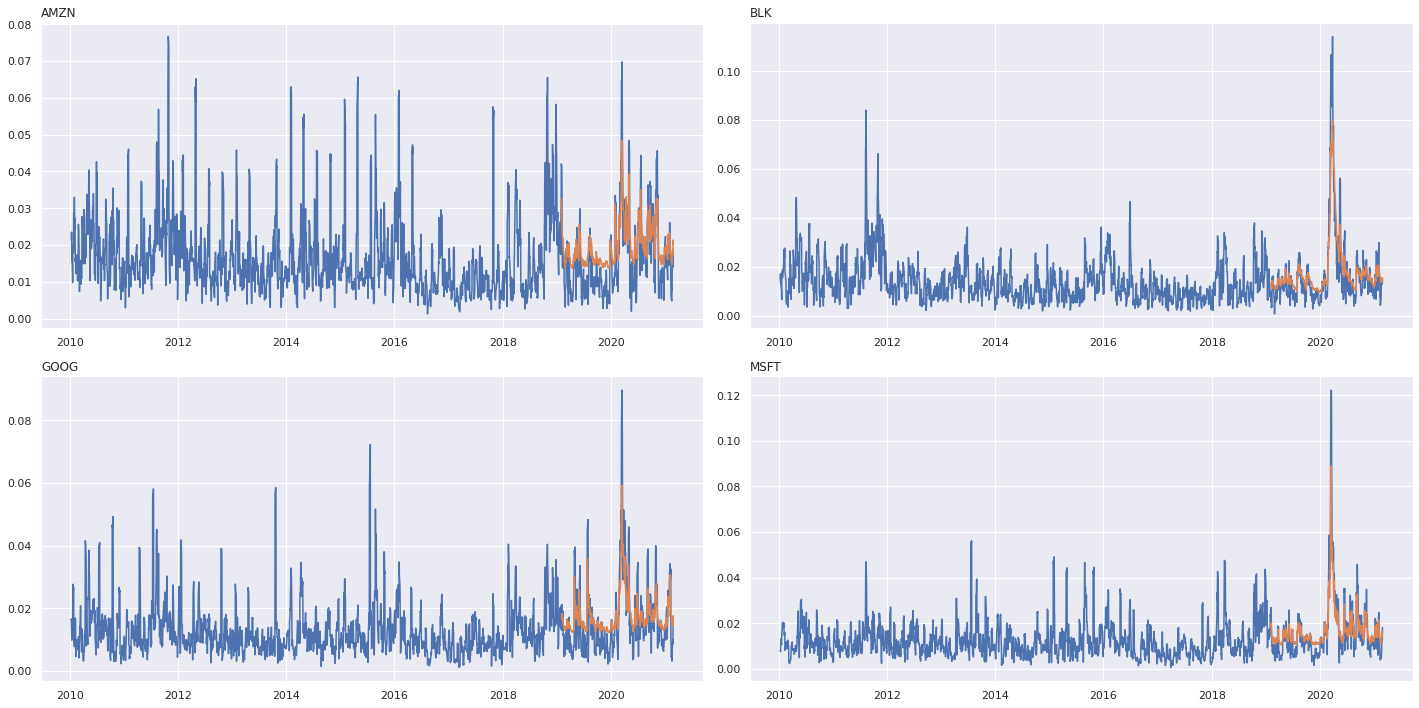

In [42]:
sns.set()
plt.figure(figsize=(20,10))
k=0
for i,j in zip(returns_all.columns,range(len(returns_all.columns))):
    k+=1
    plt.subplot(2,2, k)
    plt.tight_layout()
    plt.plot(rv_all[i]/100)
    plt.plot(np.sqrt(forecast_garch.iloc[:,j])/100)
    plt.title(i, loc='left', fontsize=12)

# 4. Volatility Prediction Based on EGARCH Model 

At the outset of this lesson, we talked about asymmetry in volatility. Not every event leads to the same volatility, so it is a necessity to capture this volatility asymmetry. `EGARCH` (the exponential generalized autoregressive conditional heteroskedastic) is one of the models that can successfully consider this asymmetry. The equation is rather complex compared to ARCH and GARCH, but we do not need to worry about that. The equation for EGARCH is: 

$$\text{log}(h_t)=\omega + \sum^p_{j=1}\beta_j \text{log}(h_{t-j})+ \sum^q_{i=1}\alpha_i\frac{|u_{i-1}|}{\sqrt{h_{t-i}}}+\sum^q_{i=1}\gamma_i\frac{u_{t-i}}{\sqrt{h_{t-i}}}
$$

$\omega$ grasps the asymmetric shocks of volatility and $\alpha$ captures the volatility clustering. Thus, asymmetric shocks of volatility and volatility of clustering are captured by the EGARCH model.

In [43]:
results_egarch=[]
for i in returns_all.columns:
    results_egarch.append(arch_model((returns_all[i]),mean='Constant',vol='egarch',dist='Normal').fit(disp='off'))

The result of the EGARCH model is given below:

In [44]:
results_egarch

[                     Constant Mean - EGARCH Model Results                     
 Dep. Variable:                   AMZN   R-squared:                      -0.001
 Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
 Vol Model:                     EGARCH   Log-Likelihood:               -5761.72
 Distribution:                  Normal   AIC:                           11531.4
 Method:            Maximum Likelihood   BIC:                           11555.2
                                         No. Observations:                 2806
 Date:                Tue, Mar 16 2021   Df Residuals:                     2802
 Time:                        19:09:28   Df Model:                            4
                                Mean Model                               
                  coef    std err          t      P>|t|  95.0% Conf. Int.
 ------------------------------------------------------------------------
 mu             0.1710  1.795e-03     95.270      0.000 [ 

In [45]:
forecast_egarch=[]
for i in range(len(returns_all.columns)):
    forecast_egarch.append(results_egarch[i].forecast(start=split_date).variance[split_date:].mean(axis=1))

In [46]:
forecast_egarch=pd.DataFrame(forecast_egarch).T

In [47]:
forecast_egarch.columns=returns_all.columns
forecast_egarch

,AMZN,BLK,GOOG,MSFT
Date,,,,
2019-02-01,8.935317,1.910707,3.289754,3.888279
2019-02-04,7.205547,1.700261,3.478065,4.386683
2019-02-05,6.524568,1.511900,3.292583,3.949618
2019-02-06,5.943838,1.393120,3.870508,3.601506
2019-02-07,5.735429,1.301874,3.785869,3.154986
...,...,...,...,...
2021-02-22,3.487368,2.392710,2.288714,2.294268
2021-02-23,3.056355,2.066643,2.035299,2.097091
2021-02-24,3.104821,2.109185,2.109285,1.870619


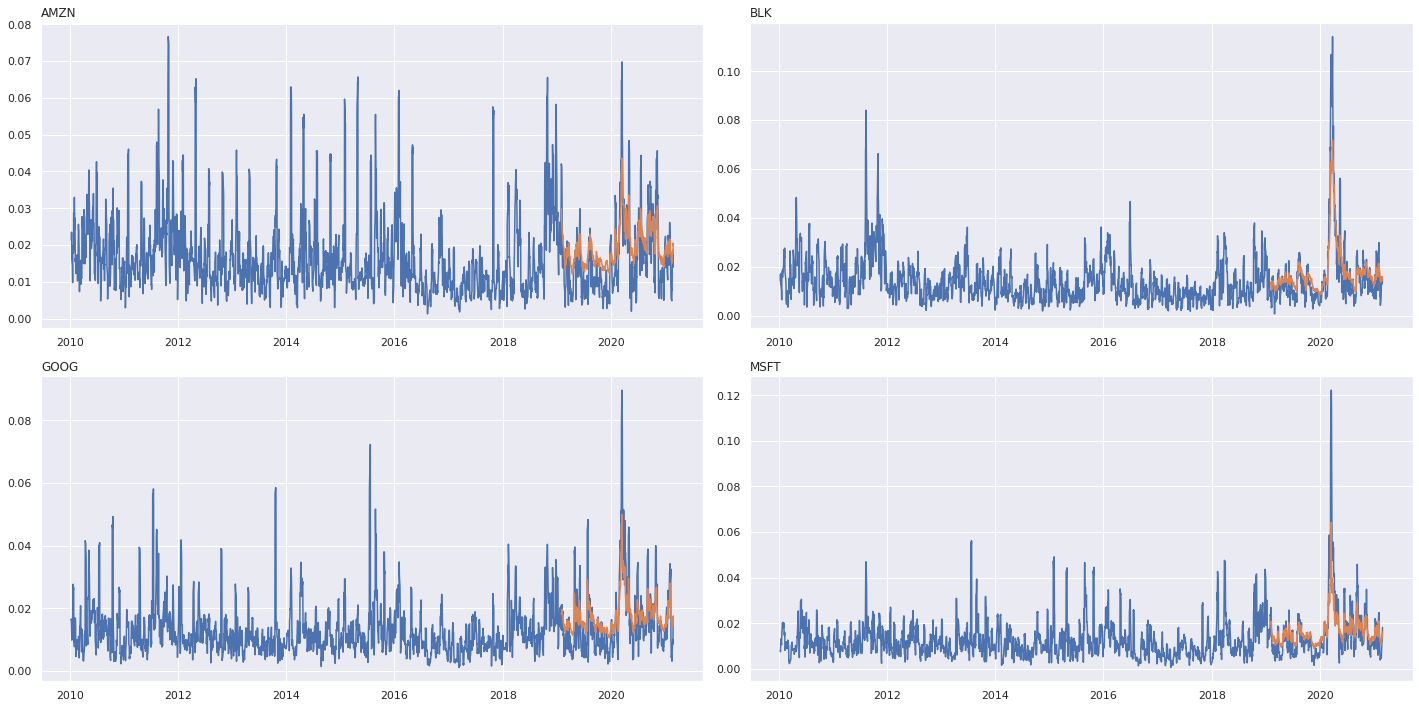

In [48]:
plt.figure(figsize=(20,10))
k=0
for i,j in zip(returns_all.columns,range(len(returns_all.columns))):
    k+=1
    plt.subplot(2,2, k)
    plt.tight_layout()
    plt.plot(rv_all[i]/100)
    plt.plot(np.sqrt(forecast_egarch.iloc[:,j])/100)
    plt.title(i, loc='left', fontsize=12)

For those who want to learn more about the `arch_model` package in Python, [see](https://arch.readthedocs.io/en/latest/univariate/introduction.html) this documentation.

---

# 5. Conclusion

Modeling volatility is of considerable importance in today's highly integrated, turbulent, and sophisticated financial markets. This lesson provides an introduction to the main volatility models. However, as you can imagine, there are many other models that try to improve the deficiencies of the existing models and capture the real-world situation in a better fashion. Next, you should review the Value at Risk and Its Application with Python notebook in this series.

# References

* [Bollerslev, T. (1986). Generalized autoregressive conditional heteroskedasticity. Journal of econometrics, 31(3), 307-327.](http://www.u.arizona.edu/~rlo/readings/278762.pdf)
* [Engle, R. F. (1982). Autoregressive conditional heteroscedasticity with estimates of the variance of United Kingdom inflation. Econometrica: Journal of the Econometric Society, 987-1007.](http://www.econ.uiuc.edu/~econ536/Papers/engle82.pdf)
